**Reference**: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow - Aurélien Géron

## Load all the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

In [ ]:
# upload the file to GitHub repo
housing_df = pd.read_csv('/content/drive/MyDrive/JTL312_Intro_to_ML/week_3/housing.csv')
housing_df.dropna(inplace=True)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Discuss NOIR

## Cleaning Data
not dropping any records due to missing values this time

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_serie = housing_df['median_house_value']
X_df = housing_df.drop(['median_house_value'], axis=1)
housing_df = X_df

In [ ]:
X_train_df, X_test_df, y_train_serie, y_test_serie = train_test_split(X_df, y_serie, train_size=0.90, random_state=42)

Separate numerical and non-numerical features

In [ ]:
X_numerical_train_df = X_train_df.select_dtypes(include=[np.number])
X_numerical_test_df = X_test_df.select_dtypes(include=[np.number])

X_nonnumerical_train_df = X_train_df.select_dtypes(exclude=[np.number])
X_nonnumerical_test_df = X_test_df.select_dtypes(exclude=[np.number])

### Impute missing values for numerical features

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
numerical_imputer = SimpleImputer(strategy="median")

In [ ]:
numerical_imputer.fit(X_numerical_train_df)

SimpleImputer(strategy='median')

In [ ]:
X_numerical_train = numerical_imputer.transform(X_numerical_train_df)

Show and explain the documentation for simple imputer


*   fit()
*   fit_transform()
* transform()



https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [ ]:
numerical_imputer.feature_names_in_, numerical_imputer.statistics_

(array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income'],
       dtype=object),
 array([-118.51  ,   34.26  ,   29.    , 2127.    ,  434.    , 1166.    ,
         409.    ,    3.5313]))

Try out other imputers:


1. k-NN imputer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer
2. Iterative Imputer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer



In [ ]:
len(X_train_df.columns), len(X_numerical_train_df.columns), len(X_nonnumerical_train_df.columns)

(9, 8, 1)

### Encode categorical features
Recall what was discussed in NOIR

In [ ]:
# explain list comprehensions one more time.
# A student must come and write a for-loop for the following:

[X_nonnumerical_train_df[col].unique() for col in X_nonnumerical_train_df.columns]

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
       dtype=object)]

In [ ]:
for column in X_nonnumerical_train_df.columns:
  print(X_nonnumerical_train_df[column].unique())


['<1H OCEAN' 'INLAND' 'NEAR BAY' 'NEAR OCEAN' 'ISLAND']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
category_encoder = OneHotEncoder(sparse_output=False)

Default for `sparse_output` is `True`, The resulting encoded array will be a sparse matrix. Dense and sparse matrices cannot be concatenated together!

In [ ]:
X_nonnumerical_train = category_encoder.fit_transform(X_nonnumerical_train_df)

In [ ]:
category_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]



1.   What is the issue with the fitting the encoder on the training data alone?
2.   What is the logical error in using an ordinal encoder?



More about encoding techniques for categorical variables
https://github.com/scikit-learn-contrib/category_encoders



## Feature Scaling

Firstly, why feature scaling is needed?

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

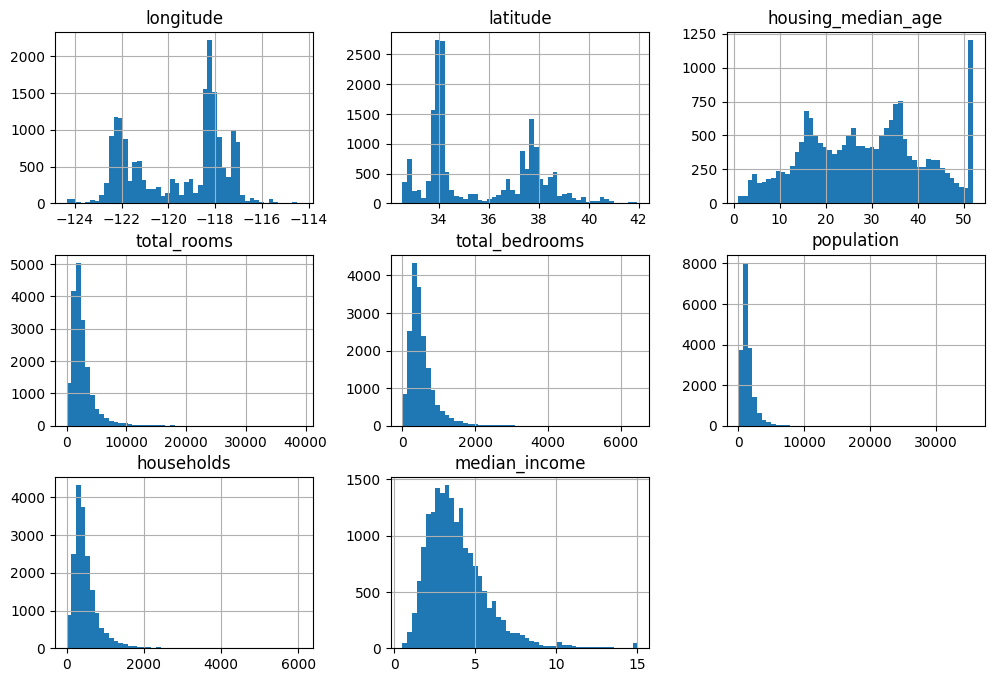

In [ ]:
X_train_df.hist(bins=50, figsize=(12,8))

Check the following scalers:


1.   min-max scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
2.   standard scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler(feature_range=(-1,1))

In [ ]:
X_minmax_scaled_train = minmax_scaler.fit_transform(np.concatenate((X_numerical_train, X_nonnumerical_train), axis=1))

## Build a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

Why `random_state` is not a parameter for the `LinearRegressor()` class?

In [ ]:
lr_model.fit(X_minmax_scaled_train, y_train_serie)

LinearRegression()

In [ ]:
lr_model.rank_, lr_model.coef_, lr_model.intercept_

(12,
 array([-133502.91529877, -118887.09465396,   27419.17423054,
        -113427.76196681,  313226.09171219, -664149.13135533,
         149651.78350252,  283140.81189563,  -11486.99525446,
         -31312.20749025,   65338.18799757,  -13384.36632482,
          -9154.61892805]),
 20662.94141430594)

## Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
X_numerical_test = numerical_imputer.transform(X_numerical_test_df)
X_nonnumerical_test = category_encoder.transform(X_nonnumerical_test_df)
X_minmax_test = minmax_scaler.transform(np.concatenate((X_numerical_test, X_nonnumerical_test), axis=1))

yhat_test_serie = lr_model.predict(X_minmax_test)

In [ ]:
y_test_serie

14425     80100.0
16398    500001.0
7721     352100.0
1411     187500.0
1336     361000.0
           ...   
10082    276600.0
8488      95500.0
10711    229200.0
5862      68300.0
20470     99300.0
Name: median_house_value, Length: 2044, dtype: float64

In [ ]:
yhat_test_serie

array([ 97145.89411372, 414154.06799959, 244582.058247  , ...,
       158721.60222024, 111674.80865266, 148835.1289984 ])

In [ ]:
lr_test_rmse = mse(y_test_serie, yhat_test_serie, squared=False)
lr_test_rmse

69164.03080536082

In [ ]:
yhat_train = lr_model.predict(X_minmax_scaled_train)
lr_train_rmse = mse(y_train_serie, yhat_train, squared=False)
lr_train_rmse

68579.56886021109

Note that the train and test RMSE is slightly better than the linear regression model that does not have "near_ocean" as a feature.

Assignment:



1.  Try different encoding techniques (eg. ordinal encoder) and test the train/test RMSEs.
2.  Repeat the experiments for different subsets of training/testing data, i.e., get the cross validation score.


